# Analisis exploratorio
El objetivo de este analisis es identificar la sustenibilidad y posible negocio de compra y venta de pilones y canos de drenaje de exceso de agua

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("trigo-serie-1927-2024.csv",encoding='latin-1')

In [3]:
hipolito_yrigoyen = df[df["departamento_nombre"] == "Hipólito Yrigoyen"]
hipolito_yrigoyen = hipolito_yrigoyen[hipolito_yrigoyen["anio"] >= 2000]

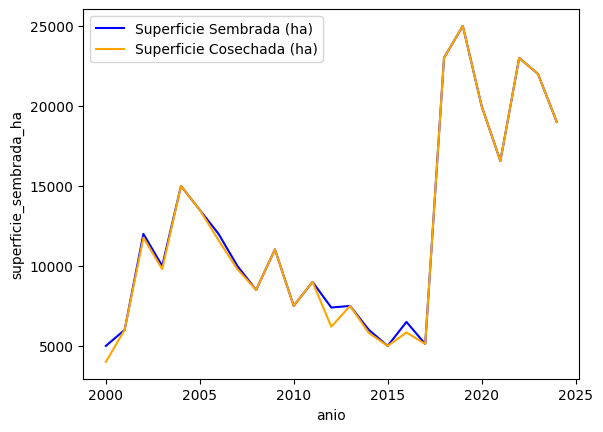

In [4]:
#time series superficie sembrada vs superficie cosechada
sns.lineplot(data=hipolito_yrigoyen, x="anio", y="superficie_sembrada_ha", color="blue", label="Superficie Sembrada (ha)")
sns.lineplot(data=hipolito_yrigoyen, x="anio", y="superficie_cosechada_ha", color="orange", label="Superficie Cosechada (ha)")
plt.show()

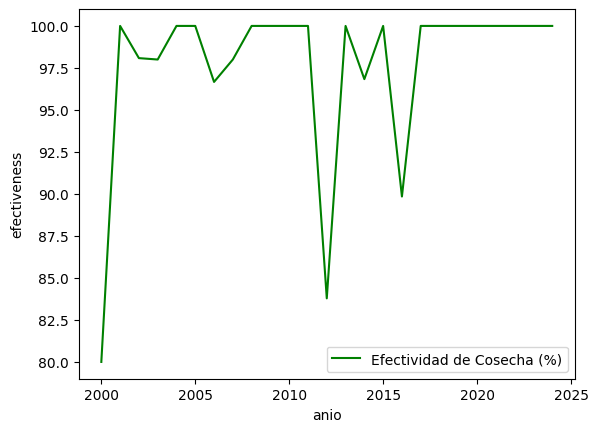

In [5]:
hipolito_yrigoyen["efectiveness"] = (hipolito_yrigoyen["superficie_cosechada_ha"] / hipolito_yrigoyen["superficie_sembrada_ha"]) * 100
sns.lineplot(data=hipolito_yrigoyen, x="anio", y="efectiveness", color="green", label="Efectividad de Cosecha (%)")
plt.show()

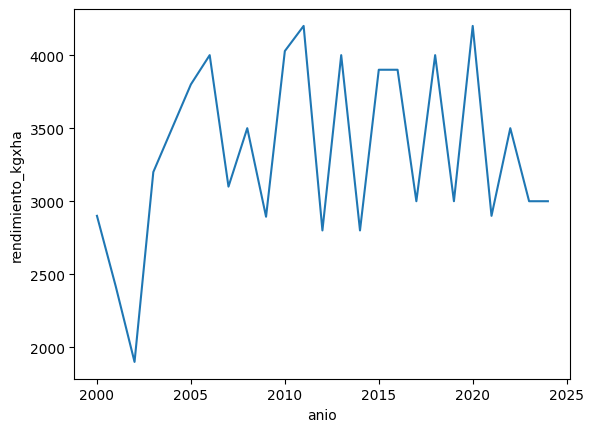

In [6]:
sns.lineplot(data=hipolito_yrigoyen, x="anio", y="rendimiento_kgxha")
plt.show()

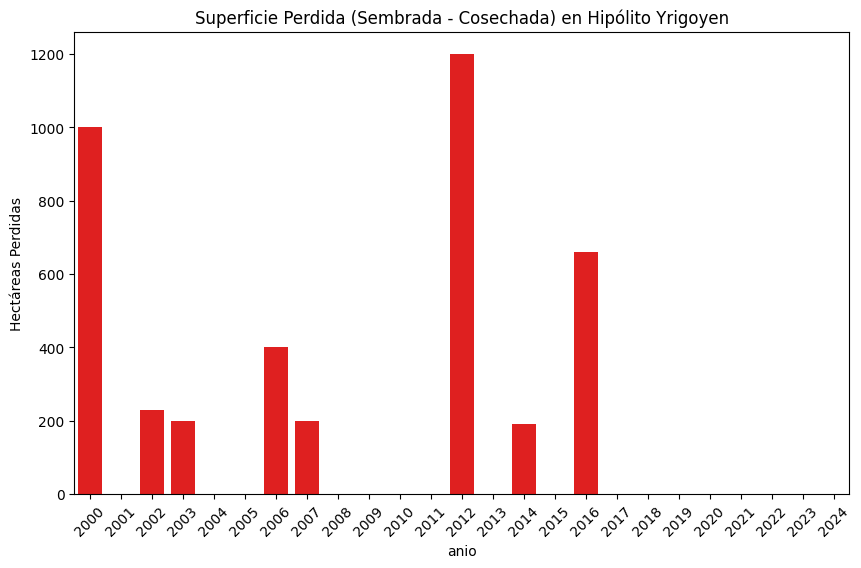

In [7]:
# Calculate lost surface
hipolito_yrigoyen["superficie_perdida_ha"] = hipolito_yrigoyen["superficie_sembrada_ha"] - hipolito_yrigoyen["superficie_cosechada_ha"]

# Plot lost surface
plt.figure(figsize=(10, 6))
sns.barplot(data=hipolito_yrigoyen, x="anio", y="superficie_perdida_ha", color="red")
plt.title("Superficie Perdida (Sembrada - Cosechada) en Hipólito Yrigoyen")
plt.ylabel("Hectáreas Perdidas")
plt.xticks(rotation=45)
plt.show()

## Análisis de Áreas Agrícolas con Mayor Riesgo
Identificaremos los departamentos con mayor porcentaje de superficie perdida promedio desde el año 2000. Esto nos ayudará a localizar zonas donde la venta de soluciones de drenaje podría ser más viable.

        provincia_nombre            departamento_nombre  loss_ratio  \
228             San Luis               Gobernador Dupuy    0.347393   
225             San Luis                      Chacabuco    0.208513   
264  Santiago del Estero                 Juan F. Ibarra    0.197812   
227             San Luis              General Pedernera    0.183053   
143              Córdoba                       Ischilín    0.181981   
122                Chaco          Mayor Luis J. Fontana    0.176441   
259  Santiago del Estero                           Copo    0.164891   
115                Chaco  Fray Justo Santa María de Oro    0.161805   
268  Santiago del Estero                     Pellegrini    0.145320   
267  Santiago del Estero                         Moreno    0.143478   
253  Santiago del Estero                        Alberdi    0.141617   
282              Tucumán          Juan Bautista Alberdi    0.138516   
149              Córdoba                       Río Seco    0.136551   
118   

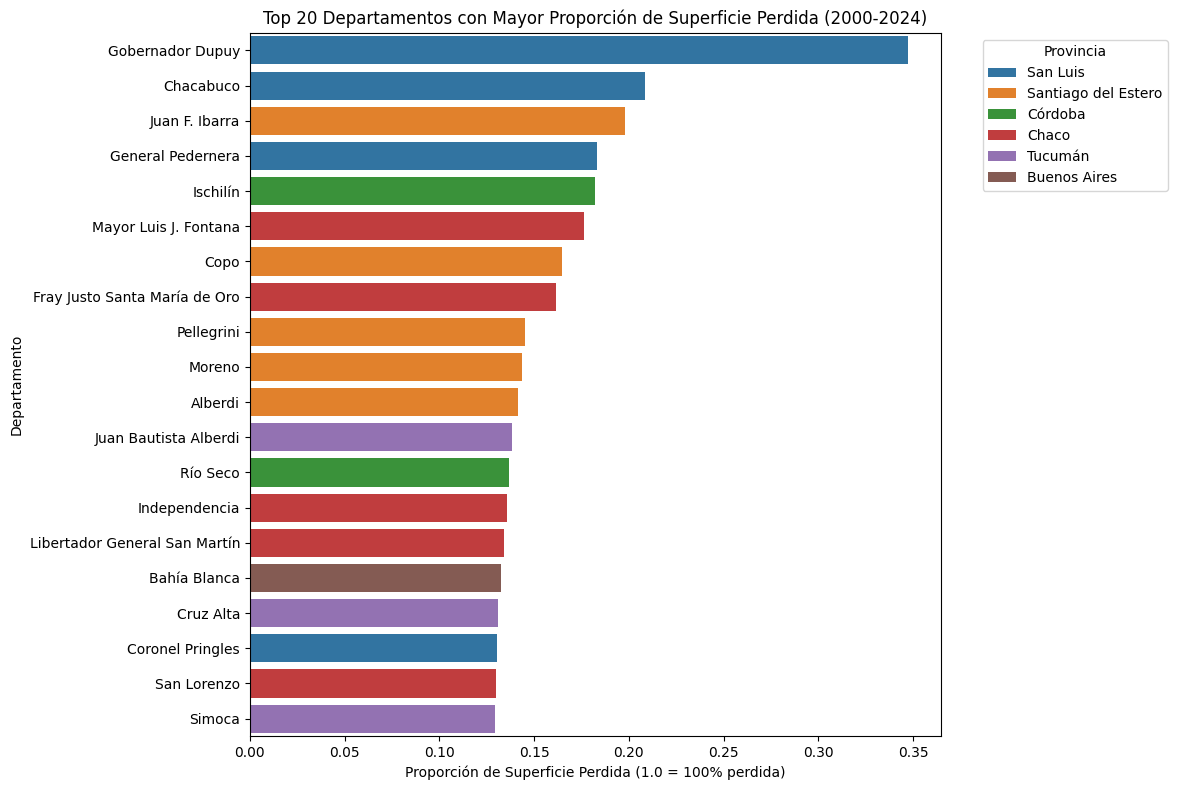

In [8]:
# Filter data for recent years
df_recent = df[df["anio"] >= 2000].copy()

# Group by department and province
dept_stats = df_recent.groupby(["provincia_nombre", "departamento_nombre"])[
    ["superficie_sembrada_ha", "superficie_cosechada_ha"]
].sum().reset_index()

# Calculate loss ratio
dept_stats["loss_ratio"] = 1 - (dept_stats["superficie_cosechada_ha"] / dept_stats["superficie_sembrada_ha"])
dept_stats["superficie_perdida_total"] = dept_stats["superficie_sembrada_ha"] - dept_stats["superficie_cosechada_ha"]

# Filter out departments with very little sowing to avoid noise (e.g., < 10000 ha total in 20+ years)
dept_stats = dept_stats[dept_stats["superficie_sembrada_ha"] > 10000]

# Sort by loss ratio
top_loss_depts = dept_stats.sort_values("loss_ratio", ascending=False).head(20)

# Display top departments
print(top_loss_depts[["provincia_nombre", "departamento_nombre", "loss_ratio", "superficie_perdida_total"]])

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_loss_depts,
    y="departamento_nombre",
    x="loss_ratio",
    hue="provincia_nombre",
    dodge=False
)
plt.title("Top 20 Departamentos con Mayor Proporción de Superficie Perdida (2000-2024)")
plt.xlabel("Proporción de Superficie Perdida (1.0 = 100% perdida)")
plt.ylabel("Departamento")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

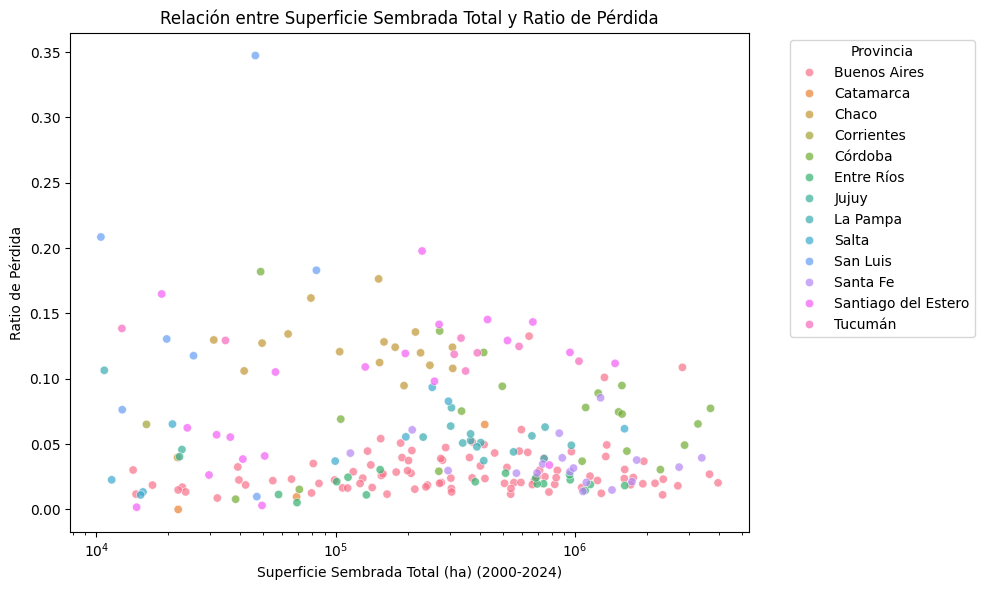

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/iandalton/Documents/Github/RANDOM/analisis-rentabilidad/.venv/lib/python3.13/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
    ~~~~~~~~^^
  File "/Users/iandalton/Documents/Github/RANDOM/analisis-rentabilidad/.venv/lib/python3.13/site-packages/ipykernel/kernelbase.py", line 577, in shell_channel_thread_main
    _, msg2 = self.session.feed_identities(msg, copy=False)
              ~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "/Users/iandalton/Documents/Github/RANDOM/analisis-rentabilidad/.venv/lib/python3.13/site-packages/jupyter_client/session.py", line 994, in feed_identities
    raise ValueError(msg)
ValueError: DELIM not in msg_list
ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/iandalton/Documents/Github/RANDOM/analisis-rentabilidad/.venv/lib/python3.13/site-pack

In [ ]:
# Scatter plot: Total Sown Area vs Loss Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dept_stats,
    x="superficie_sembrada_ha",
    y="loss_ratio",
    hue="provincia_nombre",
    alpha=0.7
)
plt.title("Relación entre Superficie Sembrada Total y Ratio de Pérdida")
plt.xlabel("Superficie Sembrada Total (ha) (2000-2024)")
plt.ylabel("Ratio de Pérdida")
plt.xscale("log") # Log scale for x-axis as surface areas can vary wildly
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Provincia")
plt.tight_layout()
plt.show()